# Ejemplo desde cero

In [1]:
# En esta parte importamos las librerias relevantes
# Tambien definimos el conjunto de datos "x" y "y" y sus respectivas matrices de covarianza (cov)
# y sus eigenvalores y eigenvectores

import numpy as np
import matplotlib.pyplot as plt
x = [2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1]
y = [2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9]
data = np.vstack([x,y])

cov = np.cov(x,y)
eigen = np.linalg.eig(cov)
mat = np.matrix(eigen[1])

[[0.61655556 0.61544444]
 [0.61544444 0.71655556]]
('eigenvalores', array([0.0490834 , 1.28402771]))
('eigenvectores', array([[-0.73517866, -0.6778734 ],
       [ 0.6778734 , -0.73517866]]))


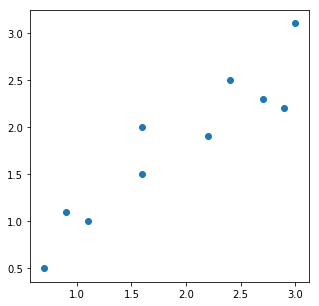

In [2]:
# Aqui graficamos los datos solo para visualizarlos

plt.figure(figsize=(5,5))
plt.scatter(y,x)
print(cov)
print('eigenvalores', eigen[0])
print('eigenvectores', eigen[1])

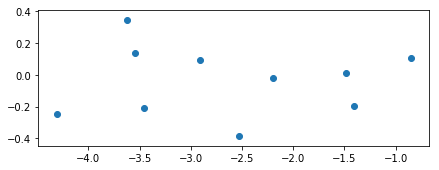

In [9]:
# Aqui se hace el cambio de base a los componentes principales y se grafica
# Se observa que los puntos son iguales pero rotados unos 166.78332 grados en contra de las manecillas del reloj

new_data = np.asarray(np.matmul(np.transpose(mat), data))
plt.figure(figsize=(7,2.5))
plt.scatter(new_data[1],new_data[0])

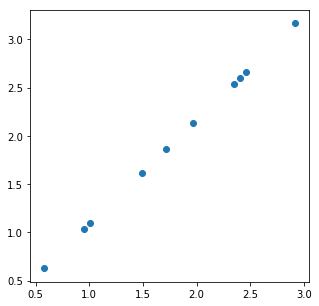

In [4]:
# En esta parte procedemos a realizar la reducción dimensional 
# y "recuperamos" los datos originales pero con menos ruido o "varianza"


data_reduced = np.asarray(np.matmul(np.transpose(np.matrix([mat[0,1],mat[1,1]])),(np.matrix(new_data[1]))))
plt.figure(figsize=(5,5))
plt.scatter(data_reduced[0],data_reduced[1])

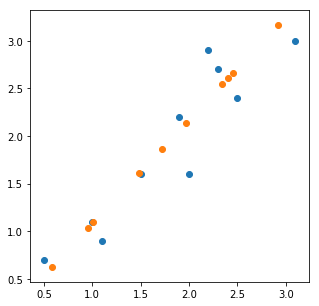

In [5]:
# Grafica donde se comparan ambos conjuntos de datos, antes y despues de hacer PCA

plt.figure(figsize=(5,5))
plt.scatter(x,y)
plt.scatter(data_reduced[0],data_reduced[1])

# Ejemplo con scikit

In [6]:
# Esta parte solo es para importar la libreria necesaria y definir los datos (son los mismos que en el ejemplo anterior)

from sklearn.decomposition import PCA
data_sk = np.transpose(data)


array([0.96318131, 0.03681869])

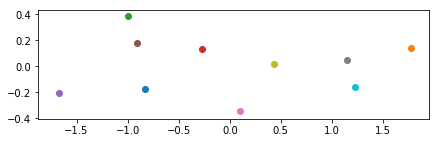

In [10]:
# En esta parte se hace el cambio de base

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_sk)
plt.figure(figsize=(7,2))

# Esta parte es la que grafica

for ii in range(len(principalComponents)):
    plt.scatter(principalComponents[ii][0], 
                principalComponents[ii][1])
    
# Esta parte nos dice cuanta informacion tiene cada componente principal

pca.explained_variance_ratio_

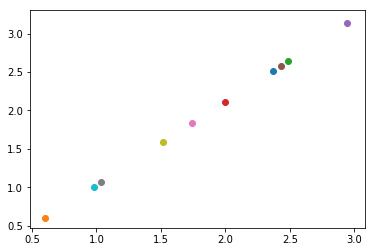

In [8]:
# Esta parte es la que hace la reduccion dimensional
pca = PCA(n_components=1)
pca.inverse_transform(pca.fit_transform(data_sk))

# Esto es para graficar
for ii in range(len(pca.inverse_transform(pca.fit_transform(data_sk)))):
    plt.scatter(pca.inverse_transform(pca.fit_transform(data_sk))[ii][0], 
                pca.inverse_transform(pca.fit_transform(data_sk))[ii][1] )

# Ejemplo con la planta iris-setosa

In [21]:
import pandas as pd

# load dataset into Pandas DataFrame
df = pd.read_csv('iris.data', names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head()
#pca.explained_variance_ratio_

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


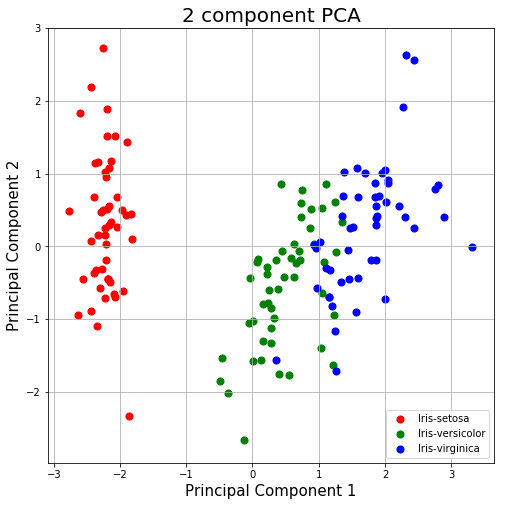

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Bonus: ejemplo aplicado a cosmologia bien chida de mi articulo

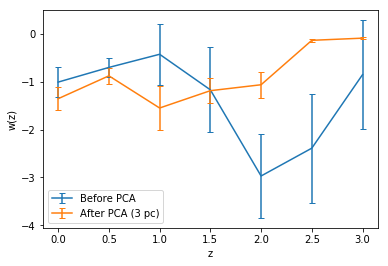

In [20]:
import numpy as np
import matplotlib.pyplot as plt

n_pca = 3

matriz_cov = np.loadtxt('owaCDM2_cov.txt')
matriz_cov = np.matrix(matriz_cov)
error = np.sqrt(np.diag(matriz_cov))
fisher = np.linalg.inv(matriz_cov)
fish_eig = np.linalg.eig(fisher)

d = np.diag(fish_eig[0])
w = np.transpose(fish_eig[1])
wt = fish_eig[1]
pt = [-1.0048, -0.697779, -0.422577, -1.16662, -2.97, -2.38769, -0.849161]
z = [ 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
pt = np.matrix(pt)
p = np.transpose(pt)
q = np.matmul(w,p)

wz = w[0]*np.asscalar(q[0])
for ii in range(n_pca-1):
    wz += w[ii+1]*np.asscalar(q[ii+1])

sigma_squared_q = 1/(np.diag(d))
sigma_wz = (sigma_squared_q[0])*(np.array(w[0])[0]**2)
for ii in range(n_pca-1):
    sigma_wz += (sigma_squared_q[ii+1])*(np.array(w[ii+1])[0]**2)
sigma_wz = sigma_wz**0.5
    
plt.errorbar(z, np.array(pt)[0],yerr=error, fmt='-',capsize=3)
plt.errorbar(z, np.array(wz)[0],yerr=sigma_wz, fmt='-',capsize=3)

plt.ylabel('w(z)')
plt.xlabel('z')

plt.legend(('Before PCA','After PCA (3 pc)'))

In [17]:
suma = 0
for ii in range(len(fish_eig[0])):
    suma+=fish_eig[0][ii]
print(suma)
print (fish_eig[0][0]+fish_eig[0][1]+fish_eig[0][2])/suma

271.22291597376966
0.9850362892567269


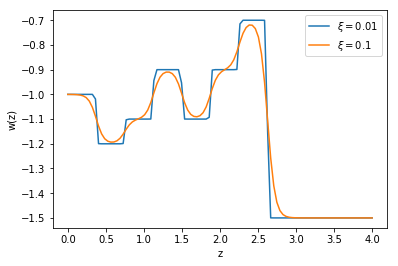

In [2]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

#ecuacion de estado de la energia oscura en forma de bines

def eos(z, xi):
    w_i = [-1 ,-1.2 ,-1.1 ,-0.9 ,-1.1 ,-0.9,-0.7,-1.5]
    #w_i = [1,1,1,1,1,1,2,2]
    z_i = np.linspace(0.0,3.0,len(w_i)+1)
    #z_i = [0  ,0.1  ,0.2  , 0.4 , 0.6 , 0.8, 1.0 ,1.3]
    def bines(w_2,w_1,z_2,z_1,eta):
        return (w_2-w_1)*(1+np.tanh((z_2-z_1)/eta))/2
    w=w_i[0]
    for jj in range(len(w_i)-1):
        w+=bines(w_i[jj+1],w_i[jj],z,z_i[jj+1],xi)
    return w

z=np.linspace(0.0,4.0,100)
plt.plot(z,eos(z,0.01))
plt.plot(z,eos(z,0.1))
plt.ylabel(r'w(z)')
plt.xlabel(r'z')
plt.legend((r'$\xi = 0.01$',r'$\xi = 0.1$'))